# Intro to AI

## Prelude
Hi, this is gonna be one of my first introductions to ✨ *AI* ✨
This is also gonna serve as one of my templates for future AI quick starters.

## About this project
We will take data of a simple equation **(y = x + 10)** (we only know the equation here in this example, cuz this is a demo)
And make our model predict values by making it guess this equation

### Normal import stuff

In [39]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.10.0


In [40]:
import numpy as np
import matplotlib.pyplot as plt

### Creating *Features*
We are gonna follow simple mathematical name schemes/notations (Capitals for tensors/matrices/vectors)

#### ELI5 (FEATURES)
Imagine you want to predict how tall a plant will grow based on some information you have about it. In a regression model, "features" are like the pieces of information you use to make that prediction.

Let's say you know three things about the plant: how much sunlight it gets each day, how much water you give it, and how old it is. These three things are the features in your regression model.

So, in a nutshell, features are the specific pieces of information or data you use to make predictions in a regression model. In the case of predicting plant height, your features are the amount of sunlight, water, and the age of the plant. The model then uses these features to estimate or "regress" to predict the height of the plant.

In [41]:
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

### Creating Labels
Same as above, we are gonna follow simple mathematical name schemes (Capitals for tensors/matrices/vectors)

#### ELI5 (LABELS)
Let's stick with the example of trying to predict how tall a plant will grow. In a regression model, the "labels" are like the answers or outcomes we want to predict.

Think of labels as the thing you're trying to figure out. So, in this case, the label would be the actual height of the plant. You want to predict how tall the plant will be, but you don't know that in advance. That's where the regression model comes in.

You use the features (like sunlight, water, and age) to help the model make its best guess at the label, which is the plant's height. The label is the answer or the target value you're trying to get as close to as possible with your predictions.

So, in simple terms, labels in a regression model are the things you're trying to predict or find out, like how tall the plant will grow. The model's job is to use the features to make a good estimate of these labels.

In [42]:
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

For confirming that our entered data, we will visualize it.

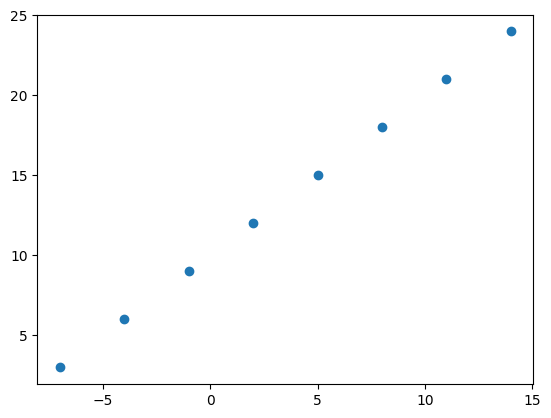

In [43]:
plt.scatter(X, Y)

In [44]:
# confirming we are indeed following it but programmatically this time
Y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

The model is going to use the features to predict the labels for unknown values. 

The sets above represent "training data" which would be fed to the model first for it to "learn" the behaviour/interactions b/w the features and labels. As the programmers behind this model, it its important to have consistency between the input and output data. This consistency can be achieved by having same/similar labels (output) *shapes* for same/similar features (input) *shapes*.

We will observe the shapes of our training data, now.

In [45]:
X[0], Y[0]

(-7.0, 3.0)

Just trying out logging, inputs and outputs for once.

In [46]:
training_input_shape = X.shape
training_output_shape = Y.shape

singular_training_input_shape = X[0].shape
singular_training_output_shape = Y[0].shape

training_input_shape, training_output_shape

((8,), (8,))

8 columns, visibly, makes sense

In [47]:
singular_training_input_shape, singular_training_output_shape

((), ())

Empty? why? our data's single element is not vector, not a matrix, it's a scalar, scalars do not have dimensions/shape, thus an empty tuple, similarly, to check it's n dimensions...

In [48]:
X[0].ndim

0

Obviously 0, cuz its a scalar.

# Note: TensorFlow 2.7.0+

You might see this error:

ValueError: Exception encountered when calling layer "sequential" (type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None,), dtype=float32)
      • training=True
      • mask=None
This happens because model.fit() no longer automatically upscales inputs from shape (batch_size, ) to (batch_size, 1).

This results in a shape error (remember one of most common errors in deep learning is input and output shapes).

To fix this, you can update the shape.

Fix
If you're running TensorFlow 2.7.0+ and you're passing a vector to a model, you need to expand its dimensions.

### OLD
#### Fit the model
model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
 
### New
#### Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # <- updated line
The code adds an extra dimension to X on the last axis, turning it ndim=1 to ndim=2 (what the model requires).

Firstly let's convert our numpy arrays to tensorflow tensors.

In [49]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.constant(X, dtype=tf.float32)
Y = tf.constant(Y, dtype=tf.float32)

X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

Reconfirming shape mutation in tf (there would be none...)

In [50]:
input_shape = X[0].shape
output_shape = Y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

there is none !

![yay](assets/image.png)

let's plot a scatter graph too while at it... (versatility and interoperability of these python libs really at show here...)

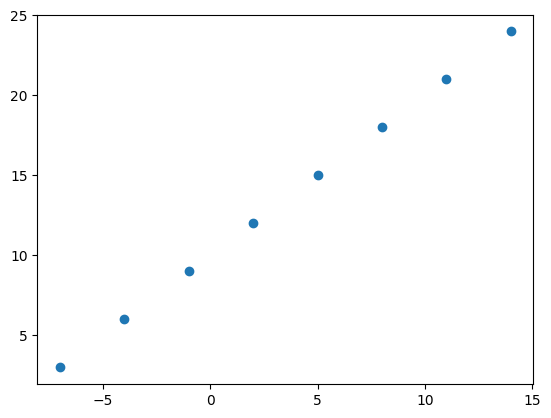

In [51]:
plt.scatter(X,Y)

#### Steps in modelling with TensorFlow

1. **Creating a model** - Define the input and output layers, as well as the hidden layers of the deep learning model.
2. **Compiling a model** - Define the loss function (the function which tells us how wrong our model is) and the optimizer (tells out model how to improve the patterns of it's learning) and evaluation metrics (that we can use to interpret the performance of our model)
3. **Fitting a model** - Let the model try to find patterns between the features and labels

# 0. Set seed to get a certain amount of reproducability

In [52]:
# Set random seed

# 42 the answer to universe bebe
tf.random.set_seed(42)

# 1. Create a model using the sequential api

In [53]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

##### What is MAE (ELI5)
 Let's explain mean absolute error (MAE) in the context of TensorFlow modeling.

Imagine you have a robot that's trying to play darts and hit a target on a dartboard. The robot throws several darts, but some land closer to the target, and some land farther away.

The "error" in this case is how far each dart landed from the center of the target. Some errors are positive (darts that landed too far to the right or above the center), and some are negative (darts that landed too far to the left or below the center).

Now, the "mean" in mean absolute error simply means you're going to calculate the average of all these errors. You add up the errors from all the darts and then divide by the total number of darts to find the average error.

So, in TensorFlow modeling, MAE is a way to measure how far off your model's predictions are from the actual values. It calculates the average of these differences, and the lower the MAE, the better your model is at making accurate predictions. Just like the robot trying to hit the target, you want your model to have a low MAE, meaning it's making predictions that are, on average, very close to the actual values.

##### What is SGD (ELI5)
Let's break down stochastic gradient descent (SGD) in the context of TensorFlow modeling:

Imagine you have a big jigsaw puzzle, and you want to find the best way to put all the pieces together. The problem is that there are many pieces, and it's challenging to figure out the right order all at once. So, you decide to solve it step by step.

Stochastic gradient descent is like having a magic hand that helps you find the best piece to add to the puzzle. Here's how it works:

Stochastic: This means "random" or "chance." Instead of looking at all the puzzle pieces at once, you randomly pick a small group of pieces.

Gradient: Think of this as a slope or hill. In our puzzle example, the gradient tells you which direction to move the puzzle piece to make it fit better.

Descent: This means going downhill. Your goal is to move the puzzle piece in the direction that makes it fit better with the pieces you've already placed.

Now, imagine you start with a piece and randomly pick a few more pieces. You look at those pieces and use the gradient to figure out how to adjust them to make them fit better with the ones you've already placed.

In TensorFlow modeling, this is like adjusting the "pieces" of your model, which are the parameters (like weights and biases). You don't try to figure out the best values for all the parameters at once, which could be very complicated. Instead, you randomly pick a small batch of data (like a few puzzle pieces) and adjust the parameters based on the gradient (the direction that makes your predictions fit the data better).

You repeat this process, picking different batches of data and adjusting the parameters, until your model gets better and better at making accurate predictions.

So, in simple terms, stochastic gradient descent in TensorFlow is like solving a jigsaw puzzle one piece at a time, using randomness and gradients to find the best way to make your model fit the data. It helps your model learn and improve gradually.

In [54]:
# mae is short for mean absolute error
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

# 3. Fit the model

Refer [New > Fit the model](#fit-the-model-1)

In [55]:
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 256ms/step - loss: 8.9015 - mae: 8.9015
Epoch 2/10
1/1 [==============================] - 0s 7ms/step - loss: 8.7690 - mae: 8.7690
Epoch 3/10
1/1 [==============================] - 0s 3ms/step - loss: 8.6365 - mae: 8.6365
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 8.5040 - mae: 8.5040
Epoch 5/10
1/1 [==============================] - 0s 3ms/step - loss: 8.3715 - mae: 8.3715
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 8.2390 - mae: 8.2390
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 8.1065 - mae: 8.1065
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 7.9740 - mae: 7.9740
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 7.8415 - mae: 7.8415
Epoch 10/10
1/1 [==============================] - 0s 3ms/step - loss: 7.7090 - mae: 7.7090


In [56]:
# Check out X & Y again
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [57]:
# Try and make a prediction using our model
prediction_features = [12.0, 22.0, 33.0, 37.0, 47.5, 67.2, 74.6, 82.3, 99.9]
prediction_labels = model.predict(prediction_features)
prediction_features, prediction_labels

1/1 [==============================] - 0s 79ms/step


([12.0, 22.0, 33.0, 37.0, 47.5, 67.2, 74.6, 82.3, 99.9],
 array([[ 20.066357],
        [ 36.704987],
        [ 55.00748 ],
        [ 61.662933],
        [ 79.13349 ],
        [111.91159 ],
        [124.22418 ],
        [137.03593 ],
        [166.31993 ]], dtype=float32))

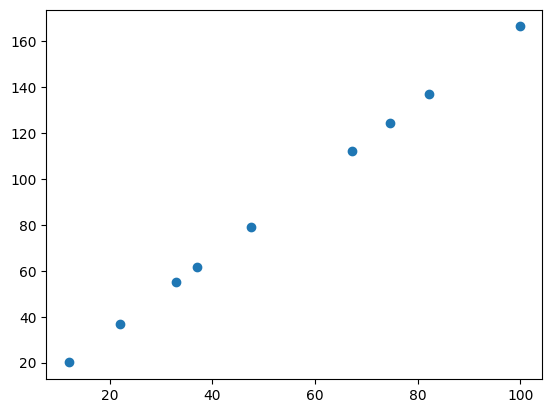

In [58]:
plt.scatter(prediction_features, prediction_labels)

# It's Shit! 

We have discovered that our model is pretty shitty as it's deviations are unreal for higher features like 99, (expected output was 109, but we got 171?! wtf?). 
Now clearly, the next question is, how to improve it?

## We can improve our models following the same steps we took in creating it...
1. **Creating a model** - Here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - Here we might change the optimization function or perhaps the **learning rate** of said optimization function.
3. **Fitting a model** - Here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [59]:
# Let's rebuild our model

# 1. Create the model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

# 3. Fit the model

model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 399ms/step - loss: 10.7285 - mae: 10.7285
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 10.5960 - mae: 10.5960
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 10.4635 - mae: 10.4635
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 10.3310 - mae: 10.3310
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 10.1985 - mae: 10.1985
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 10.0660 - mae: 10.0660
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 9.9335 - mae: 9.9335
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 9.8010 - mae: 9.8010
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 9.6685 - mae: 9.6685
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 9.5360 - mae: 9.5360
Epoch 11/100
1/1 [==============================] - 0s 5ms/step -

In [60]:
# Let's use the new model...
prediction_features = [12.0, 22.0, 33.0, 37.0, 47.5, 67.2, 74.6, 82.3, 99.9]
prediction_labels = model.predict(prediction_features)
prediction_features, prediction_labels

1/1 [==============================] - 0s 69ms/step


([12.0, 22.0, 33.0, 37.0, 47.5, 67.2, 74.6, 82.3, 99.9],
 array([[ 21.237152],
        [ 38.25561 ],
        [ 56.97592 ],
        [ 63.783306],
        [ 81.652695],
        [115.179054],
        [127.77272 ],
        [140.87694 ],
        [170.82944 ]], dtype=float32))

So much better by just training it more lol, let's see what else we can do...

In [61]:
# 1. Create the model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

model.compile(loss="mae", optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

# 3. Fit the model

model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 315ms/step - loss: 13.0274 - mae: 13.0274
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 12.4910 - mae: 12.4910
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 11.9493 - mae: 11.9493
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 11.4031 - mae: 11.4031
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 10.8430 - mae: 10.8430
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 10.2610 - mae: 10.2610
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 9.6544 - mae: 9.6544
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 9.0146 - mae: 9.0146
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 8.3395 - mae: 8.3395
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 7.6294 - mae: 7.6294
Epoch 11/100
1/1 [==============================] - 0s 5ms/step -

1/1 [==============================] - 0s 4ms/step - loss: 3.7550 - mae: 3.7550
Epoch 71/100
1/1 [==============================] - 0s 4ms/step - loss: 3.8071 - mae: 3.8071
Epoch 72/100
1/1 [==============================] - 0s 5ms/step - loss: 3.7626 - mae: 3.7626
Epoch 73/100
1/1 [==============================] - 0s 3ms/step - loss: 3.7793 - mae: 3.7793
Epoch 74/100
1/1 [==============================] - 0s 4ms/step - loss: 3.7704 - mae: 3.7704
Epoch 75/100
1/1 [==============================] - 0s 2ms/step - loss: 3.7515 - mae: 3.7515
Epoch 76/100
1/1 [==============================] - 0s 6ms/step - loss: 3.7782 - mae: 3.7782
Epoch 77/100
1/1 [==============================] - 0s 5ms/step - loss: 3.7252 - mae: 3.7252
Epoch 78/100
1/1 [==============================] - 0s 5ms/step - loss: 3.7952 - mae: 3.7952
Epoch 79/100
1/1 [==============================] - 0s 4ms/step - loss: 3.7286 - mae: 3.7286
Epoch 80/100
1/1 [==============================] - 0s 6ms/step - loss: 3.7773 - ma

LOSS AND MAE ARE LOWER YAYY!!! 🥳

In [62]:
prediction_features = [12.0, 17.0, 22.0, 33.0, 37.0, 47.5, 67.2, 74.6, 82.3, 99.9]
prediction_labels = model.predict(prediction_features)
prediction_features, prediction_labels

1/1 [==============================] - 0s 74ms/step


([12.0, 17.0, 22.0, 33.0, 37.0, 47.5, 67.2, 74.6, 82.3, 99.9],
 array([[ 23.315979],
        [ 32.607315],
        [ 41.898655],
        [ 62.339417],
        [ 69.772415],
        [ 89.2837  ],
        [125.88989 ],
        [139.64046 ],
        [153.94846 ],
        [186.65247 ]], dtype=float32))

BUT THIS OUTPUT IS WORSE THAN BEFORE!!! WHYYY??? 😵😕😖

It's because it's learning the training data too well, it knows relations between X and Y that even we might not know... 

This phenomenon is called ***OVERFITTING*** 

It's applying those patterns to the values we want predicted instead of the pattern we want it to use... So the error it's predcting, (LOSS AND MAE) are not really related to what we want (thus rendering those low values... kinda useless (**in this case**))  

So the real metrics are not obtained from MAE and LOSSES (based on training data) but on the basis of real data that it has never seen before...

## Sub-methods to improve a deep model 
```
These are called hyperparameters as each of these can be tweaked
```
- Adding Layers 
- Increase the number of hidden units
- Change the activation function
- Change the optimization function
- Change the learning rate 🌟 (most important param)
- Fitting for more data
- Fitting for longer

(hyperparameters are like hardware dials on machine that can be rotated to finetune a machine's work, where as parameters is a pattern the neural network learns (we dont work with these))

In [63]:
# 1. Create a model (specified to your problem)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(lr=0.009),
    metrics=["mae"]
)

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100


1/1 [==============================] - 1s 672ms/step - loss: 12.9230 - mae: 12.9230
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 9.9750 - mae: 9.9750
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 6.9769 - mae: 6.9769
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 4.1144 - mae: 4.1144
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 5.7896 - mae: 5.7896
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 5.7759 - mae: 5.7759
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 4.7629 - mae: 4.7629
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 3.8287 - mae: 3.8287
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 4.9472 - mae: 4.9472
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 5.3031 - mae: 5.3031
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 4.7912 - mae: 4

Test again

In [64]:
prediction_features = [12.0, 17.0, 22.0, 33.0, 37.0, 47.5, 67.2, 74.6, 82.3, 99.9]
prediction_labels = model.predict(prediction_features)
prediction_features, prediction_labels

1/1 [==============================] - 0s 126ms/step


([12.0, 17.0, 22.0, 33.0, 37.0, 47.5, 67.2, 74.6, 82.3, 99.9],
 array([[ 19.95536 ],
        [ 24.587086],
        [ 29.261711],
        [ 39.569298],
        [ 43.335392],
        [ 53.31847 ],
        [ 72.28577 ],
        [ 79.44973 ],
        [ 86.90412 ],
        [103.942726]], dtype=float32))

## Evaluating a model

In practice, a typical workflow when building a neural network is:

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> ...
```

Building model: Experiment, experiment, experiment 

Evaluating model: Visualize, visualize, visualize

It's a good idea to visualize: 
- The data - what data are we working with? What does it look like?
- The model itself - what does our model look like?
- The training of a model - how does a model perform while it learns? 
The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [65]:
# Make a bigger dataset

X = tf.range(-100, 100, 4)
Y = X + 10
X, Y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96])>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>)

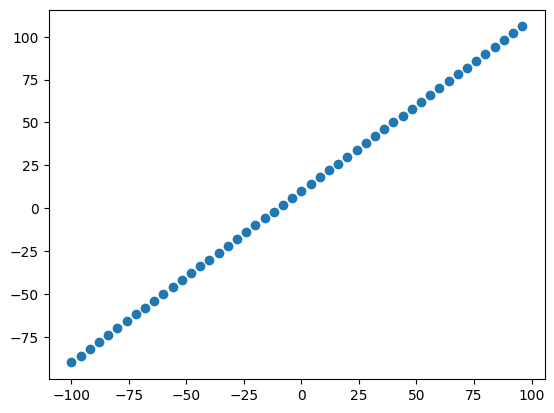

In [66]:
plt.scatter(X, Y)

### The 3 sets... 🌟

1. **Training Set** - The model learns from this data, which is typically 70-80% of the total data you have available.
2. **Validation Set** - The model gets tuned on this data,  typically 10-15% of the data available 
3. **Test Set** - The model gets evaluated on this data to test what is learned, this set is typically 10-15% of the total data available as well.

#### Analogy
Course Material -> Training Set

Practice Exam -> Validation Set

Final Exam -> Test Set

##### Generalization
The ability for a ML platform to perform on data it hasn't seen before.

In [67]:
# Check the length of how many samples we have 
len(X)

50

In [68]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
Y_train = Y[:40]

X_test = X[40:] # last 40 are test samples (20% of the data)
Y_test = Y[40:]

len(X_train), len(X_test), len(Y_train), len(Y_test)

(40, 10, 40, 10)

### Visualize the data again
Now that we have the data, let's visualize again!

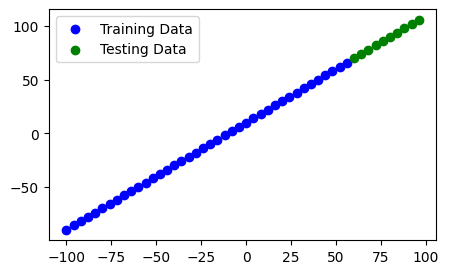

In [69]:
plt.figure(figsize=(5,3))
# plot training data in blue
plt.scatter(X_train, Y_train, c='b', label="Training Data")
# plot test data in green
plt.scatter(X_test, Y_test, c='g', label="Testing Data")
plt.legend()

# Let's have a look at how to build a neural network for our data

In [70]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="middle_layer_1"),
    tf.keras.layers.Dense(10, input_shape=[1], name="middle_layer_2"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),metrics=["mae"])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 middle_layer_1 (Dense)      (None, 10)                20        
                                                                 
 middle_layer_2 (Dense)      (None, 10)                110       
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


* Total Params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learnt patterns or parameters from other models during **transfer learning**).

📖 **Resource**: MIT's Intro to Deep Learning
🛠️ **Exercise**: Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling model.summary().

In [71]:
# 3. Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=200, verbose=0)

In [72]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 middle_layer_1 (Dense)      (None, 10)                20        
                                                                 
 middle_layer_2 (Dense)      (None, 10)                110       
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


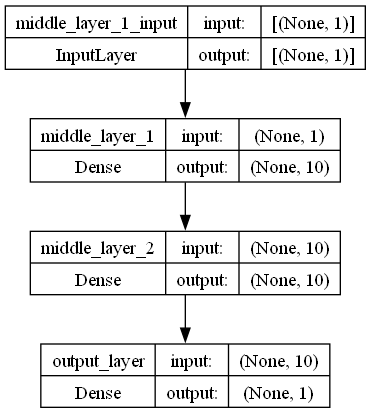

In [73]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

# Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [74]:
# Make some predictions
Y_pred = model.predict(X_test)

Y_pred, Y_test

1/1 [==============================] - 0s 62ms/step


(array([[ 70.76132 ],
        [ 74.84681 ],
        [ 78.932304],
        [ 83.01779 ],
        [ 87.10329 ],
        [ 91.188774],
        [ 95.27427 ],
        [ 99.35976 ],
        [103.445244],
        [107.530754]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>)

In [75]:
def plot_predictions(train_data=X_train, train_labels=Y_train, test_data=X_test, test_labels=Y_test, predictions=Y_pred):
    """
    Plots training data, test data and compares predictions to the ground truth labels.
    """
    plt.figure(figsize=(10,7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training Data")
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing Data")
    # Plot model's predictions in red
    plt.scatter(test_data, predictions, c="r", label="Prediction Data")
    # Show the legend
    plt.legend();

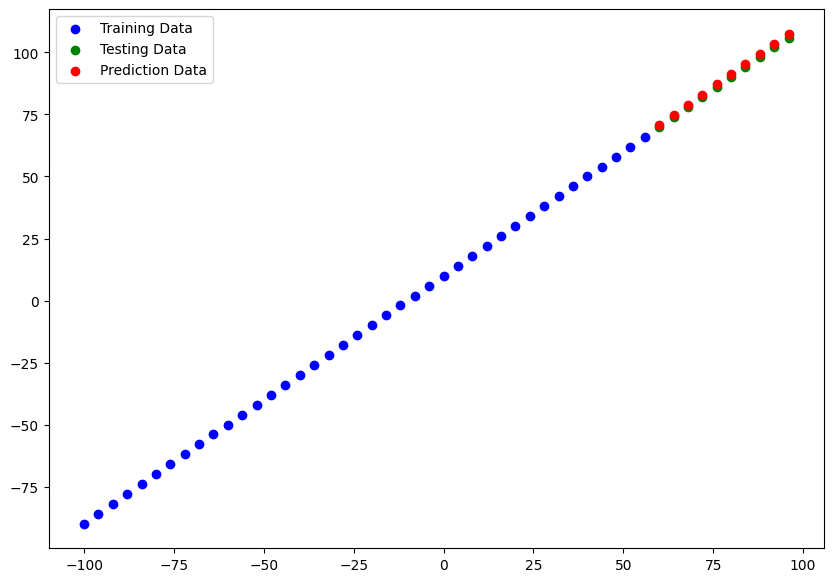

In [76]:
plot_predictions(train_data=X_train, 
                 train_labels=Y_train, 
                 test_data=X_test, 
                 test_labels=Y_test, 
                 predictions=Y_pred
                 )

# Evaluating our model's prediction with regression evaluation metrics
Depending on problem being worked on there will be different evaluation metrics to evaluate your model. Since we are working on a regression, two of the main metrics: 
- MAE - mean absolute error, "on average, how wrong is each of the model's predictions"
- MSE - mean square error, "square the average errors"

In [77]:
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 137ms/step - loss: 1.1460 - mae: 1.1460


[1.1460297107696533, 1.1460297107696533]

In [79]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(Y_test, tf.squeeze(Y_pred))
mse = tf.metrics.mean_squared_error(Y_test, tf.squeeze(Y_pred))
mae, mse

(<tf.Tensor: shape=(), dtype=float32, numpy=1.1460311>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.3736852>)

In [86]:
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true, tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true, tf.squeeze(y_pred))

## Running experiements on out model

```
Build a model -> fit it -> tweak it -> evaluate it -> fit it -> tweak it -> evaluate it -> fit it -> tweak it -> evaluate it -> fit it -> tweak it -> evaluate it ... 
```

1. Get more data - get more examples for your model to train on (more opportunities to lean patterns or relationships between features and labels).

2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.

3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer trained for 100 epochs
2. `model_2` - 2 layers trained for 100 epochs
3. `model_3` - 2 layers trained for 500 epochs

**Build `model_1`**

In [81]:
# Set random seed 
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 50.4064 - mae: 50.4064
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 17.5601 - mae: 17.5601
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 16.8454 - mae: 16.8454
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 9.1068 - mae: 9.1068
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 11.0392 - mae: 11.0392
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1989 - mae: 10.1989
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 9.2144 - mae: 9.2144
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 9.1497 - mae: 9.1497
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 11.7622 - mae: 11.7622
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 13.6824 - mae: 13.6824
Epoch 11/100
2/2 [==============================] - 0s 4ms/step -

1/1 [==============================] - 0s 41ms/step


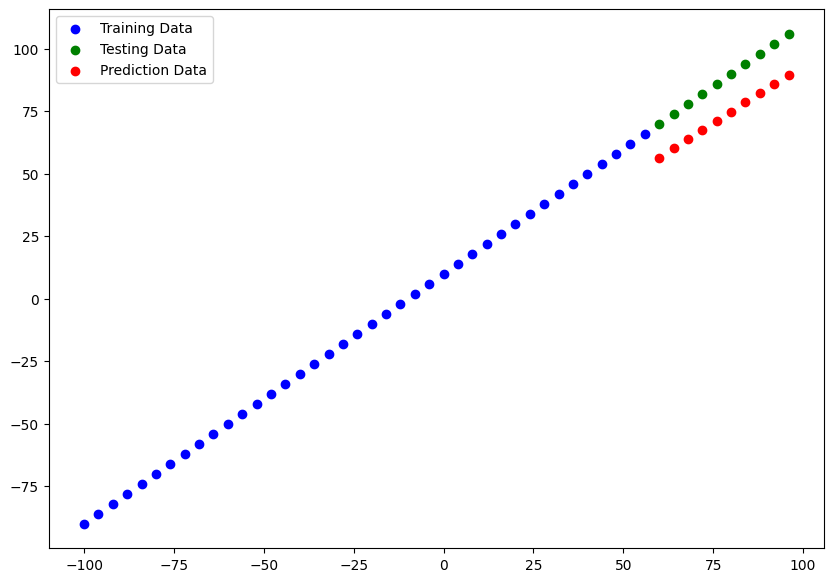

In [82]:
# Make and plot predictions for model_1

y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [87]:
# Calculate model_1 evaluation metrics 

mae_1 = mae(Y_test, y_preds_1)

mse_1 = mse(Y_test, y_preds_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.931368>,
 <tf.Tensor: shape=(), dtype=float32, numpy=223.78433>)

**Build `model_2`**

In [145]:
# Set random seed 
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(), metrics=["mse"])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)

Epoch 1/100


2/2 [==============================] - 0s 3ms/step - loss: 42.3549 - mse: 2525.6038
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 32.3326 - mse: 1440.1359
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 37.0688 - mse: 2048.6306
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 25.1306 - mse: 913.5392
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 14.8822 - mse: 277.0834
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.8498 - mse: 166.4946
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1949 - mse: 151.9113
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1245 - mse: 160.4005
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 40.6809 - mse: 2613.9114
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 28.0469 - mse: 1108.8280
Epoch 11/100
2/2 [==============================] - 0s 5

1/1 [==============================] - 0s 49ms/step


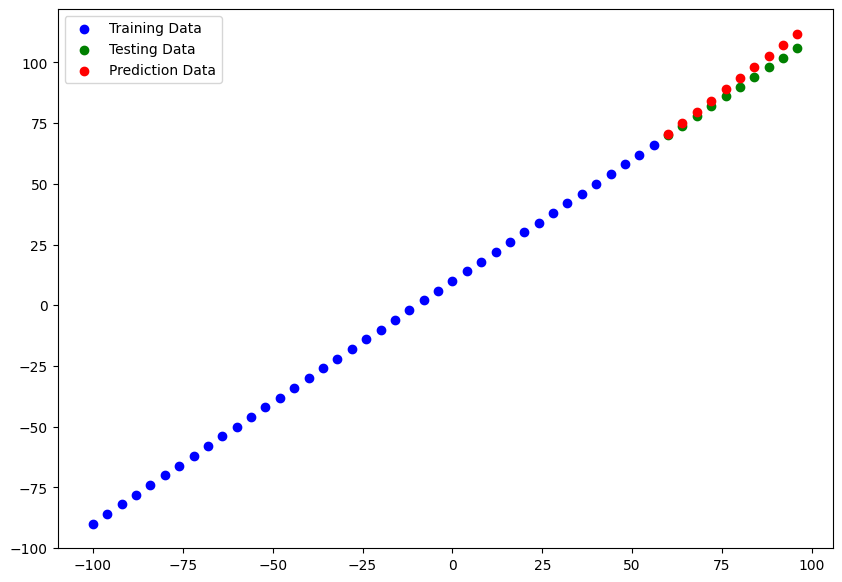

In [146]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [147]:
# Calculate model_1 evaluation metrics 

mae_2 = mae(Y_test, y_preds_2)

mse_2 = mse(Y_test, y_preds_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.178576>,
 <tf.Tensor: shape=(), dtype=float32, numpy=12.945129>)

**Build `model_3`**

In [116]:
# Set random seed 
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

# Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 4ms/step - loss: 52.8386 - mae: 52.8386
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 23.1857 - mae: 23.1857
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 18.3321 - mae: 18.3321
Epoch 4/500
2/2 [==============================] - 0s 4ms/step - loss: 13.3844 - mae: 13.3844
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 14.7479 - mae: 14.7479
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 11.7404 - mae: 11.7404
Epoch 7/500
2/2 [==============================] - 0s 6ms/step - loss: 11.0801 - mae: 11.0801
Epoch 8/500
2/2 [==============================] - 0s 12ms/step - loss: 11.0618 - mae: 11.0618
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 40.0167 - mae: 40.0167
Epoch 10/500
2/2 [==============================] - 0s 2ms/step - loss: 27.4672 - mae: 27.4672
Epoch 11/500
2/2 [==============================] - 0s 5ms

1/1 [==============================] - 0s 90ms/step


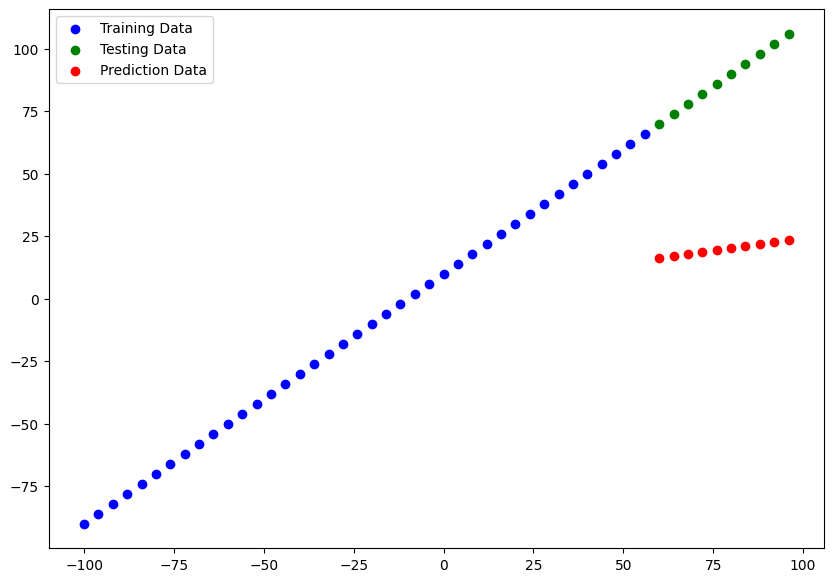

In [117]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [118]:
# Calculate model_1 evaluation metrics 

mae_3 = mae(Y_test, y_preds_3)

mse_3 = mse(Y_test, y_preds_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.12582>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4726.066>)

**🔑 Note:** You want to start with small experiemnts (small models) and make sure they work and then increase their scale when necessary.

## Comparing the results of our experiments
We've run a few experiments, let's compare the results.

In [148]:
# Let's compare our model's results using a pandas DataFrame

import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],["model_2", mae_2.numpy(), mse_2.numpy()],["model_3", mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns=["model","mae", "mse"])
all_results

,model,mae,mse
0,model_1,14.931368,223.784332
1,model_2,3.178576,12.945129
2,model_3,68.125816,4726.065918


Model 2 performed best

In [149]:
model_2.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 100)               200       
                                                                 
 dense_68 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


## Tracking results 

One really good habit in ML modelling is to trach the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckilu, there are tools to help us!

**📖 Resource:** As you build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all kinds of ML experiments (plugs straight into TensorBoard).


# Saving models

Saving the model allows us to use them outside of training app such as in a web app or a mobile app

There are 2 legacy formats to save the models:
1. The SavedModel format
2. The HDF5 format

Comparision at https://github.com/huggingface/safetensors#yet-another-format-

at date of writing safetensors is best format, but not with tensorflow lib so, will visit later as it's outside of scope of this proj rn

In [151]:
# Saving using SavedModel format
model_2.save("model-save")
model_2.save("model-save.h5")

INFO:tensorflow:Assets written to: model-save\assets


# Loading models


In [152]:
loaded_model = tf.keras.models.load_model("./model-save")
loaded_model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 100)               200       
                                                                 
 dense_68 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [153]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_model_preds = loaded_model.predict(X_test)

model_2_preds == loaded_model_preds

1/1 [==============================] - 0s 59ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])